In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_data = pd.read_csv('dataTrain.csv',names=["Area of Land in acres","Amount of Production in Tons"]) #read the data

In [3]:
my_data.head()

,Area of Land in acres,Amount of Production in Tons
Temperature(K),Pressure(ATM),CompressibilityFactor(Z)
303.230000,23.434000,0.725550
313.345000,26.435000,0.752416
323.345000,29.344000,0.778906
383.345000,25.876000,0.912745


In [4]:
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

In [5]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [6]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

TypeError: Object arrays are not currently supported

NameError: name 'cost' is not defined

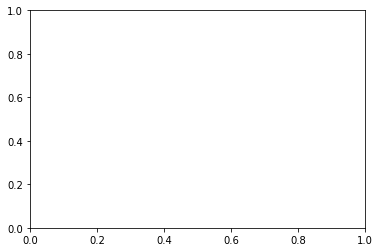

In [7]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  